# Análisis exploratorio de los datos 2
# INE - Permisos de Edificación
## Trabajo MDS-2oTrim. ==> Inmigracion en Chile

**Profesora:** Donoso I.<br>
**Alumnos:** Briceno, H.; Rovai, M.; Tessada G.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

## 1. Importar el dataset

Vamos a usar datos de la base de datos del [INE - Permisos de Edificacion](http://www.ine.cl/herramientas/galeria-de-mapas/permisos-de-edificacion). 

In [82]:
ls ./data

PDs-2005-2016.xlsx
PDs-2017.xlsx
PDs_2018_1.xlsx
Visas-2005-2010.xlsx
Visas-2011-2016.xlsx
Visas-2017.xlsx
Visas-2018_1.xlsx
frec_casos_dmcs_mensual_2001_2017w.xlsx
inmigrantes_metropolitana.xlsx
pe_2010-2017.xlsx


In [135]:
df1 = pd.read_excel('./data/pe_2010-2017.xlsx')
df1.shape

(114690, 11)

In [136]:
df1.head(2)

,ID,COD_REG,CUT,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,uso_destino,superficie,Localización
0,110120100001,1,1101,Iquique,2010,5,2,Casa continua,HABITACIONAL,307,RANGE_INTERPOLATED
1,110120100002,1,1101,Iquique,2010,1,1,Casa continua,HABITACIONAL,98,RANGE_INTERPOLATED


In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114690 entries, 0 to 114689
Data columns (total 11 columns):
ID                 114690 non-null int64
COD_REG            114690 non-null int64
CUT                114690 non-null int64
Comuna             114690 non-null object
Año                114690 non-null int64
cantidad_unidad    114690 non-null int64
num_pisos          114690 non-null int64
glosa_destino      114690 non-null object
uso_destino        114690 non-null object
superficie         114690 non-null int64
Localización       114690 non-null object
dtypes: int64(7), object(4)
memory usage: 9.6+ MB


## 2. Limpiar el dataset

In [138]:
def replaceCaracteres(text):
    text = text.replace('á', 'a')
    text = text.replace('é', 'e')
    text = text.replace('í', 'i')
    text = text.replace('ó', 'o')
    text = text.replace('ú', 'u')
    text = text.replace('ñ', 'n')
    text = text.replace('ã', 'a')
    return text

In [139]:
def limpiaTexto(text):
    text = text.lower()
    text = replaceCaracteres(text)
    return text 

In [140]:
df1['Comuna'] = df1.Comuna.apply(limpiaTexto)

In [141]:
df1.Comuna.value_counts()

chillan                3405
colina                 3187
los angeles            3178
talca                  2732
curico                 2686
valparaiso             2663
temuco                 2639
valdivia               2530
cauquenes              2442
linares                2404
osorno                 2137
concepcion             2017
alto hospicio          1877
san carlos             1843
puerto montt           1760
melipilla              1681
coquimbo               1651
coronel                1568
antofagasta            1522
castro                 1503
punta arenas           1431
talcahuano             1391
la serena              1359
machali                1358
quilpue                1341
san pedro de la paz    1296
santiago               1280
pichilemu              1275
angol                  1273
puerto varas           1256
                       ... 
quilicura               463
calera                  445
padre hurtado           424
vitacura                403
isla de pascua      

In [142]:
df1.isnull().sum(axis=0)

ID                 0
COD_REG            0
CUT                0
Comuna             0
Año                0
cantidad_unidad    0
num_pisos          0
glosa_destino      0
uso_destino        0
superficie         0
Localización       0
dtype: int64

In [143]:
df1.COD_REG.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [144]:
df1[df1.COD_REG == 13].Comuna.unique()

array(['santiago', 'cerrillos', 'cerro navia', 'conchali', 'el bosque',
       'estacion central', 'huechuraba', 'independencia', 'la cisterna',
       'la florida', 'la granja', 'la pintana', 'la reina', 'las condes',
       'lo barnechea', 'lo espejo', 'lo prado', 'macul', 'maipu', 'nunoa',
       'pedro aguirre cerda', 'penalolen', 'providencia', 'pudahuel',
       'quilicura', 'quinta normal', 'recoleta', 'renca', 'san joaquin',
       'san miguel', 'san ramon', 'vitacura', 'puente alto', 'pirque',
       'san jose de maipo', 'colina', 'lampa', 'san bernardo', 'buin',
       'paine', 'melipilla', 'talagante', 'padre hurtado', 'penaflor'],
      dtype=object)

Se observa que hay informaciones en mayusculas y minusculas. Cambiemos todas las columnas del dataset con strings a minusculas y aprovechamos y veriquemos que no hay caracteres especiales

In [145]:
df = df1[df1.COD_REG == 13]

In [146]:
df.shape

(29330, 11)

In [147]:
df.head()

,ID,COD_REG,CUT,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,uso_destino,superficie,Localización
81426,1310120100001,13,13101,santiago,2010,2,2,Casa continua; Comercio,MIXTO,213,ROOFTOP
81427,1310120100002,13,13101,santiago,2010,1,1,Comercio,NO HABITACIONAL,250,ROOFTOP
81428,1310120100003,13,13101,santiago,2010,2,8,Comercio; Oficinas sin destino específico,NO HABITACIONAL,32880,RANGE_INTERPOLATED
81429,1310120100004,13,13101,santiago,2010,1,1,Comercio,NO HABITACIONAL,244,ROOFTOP
81430,1310120100005,13,13101,santiago,2010,1,3,"Jardines infantiles, parvularios",NO HABITACIONAL,1038,ROOFTOP


In [148]:
del df['ID']

In [149]:
del df['COD_REG']

In [150]:
del df['CUT']

In [151]:
del df['Localización']

In [152]:
df.head(2)

,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,uso_destino,superficie
81426,santiago,2010,2,2,Casa continua; Comercio,MIXTO,213
81427,santiago,2010,1,1,Comercio,NO HABITACIONAL,250


In [153]:
df.uso_destino.value_counts()

HABITACIONAL       20162
NO HABITACIONAL     7349
MIXTO               1819
Name: uso_destino, dtype: int64

In [154]:
df.uso_destino.replace('MIXTO', 'HABITACIONAL', inplace=True)

/Users/mjrovai/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [155]:
df.uso_destino.value_counts()

HABITACIONAL       21981
NO HABITACIONAL     7349
Name: uso_destino, dtype: int64

In [156]:
df = df[df.uso_destino == 'HABITACIONAL']

In [157]:
df.uso_destino.value_counts()

HABITACIONAL    21981
Name: uso_destino, dtype: int64

In [158]:
del df['uso_destino']

In [159]:
df.head(2)

,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,superficie
81426,santiago,2010,2,2,Casa continua; Comercio,213
81431,santiago,2010,113,7,Dos edificios o bloques,5568


In [160]:
df.glosa_destino.value_counts()

Casa aislada                                                                                              14946
Casa pareada                                                                                               3375
Edificio o bloque único                                                                                     841
Casa continua                                                                                               661
Casa aislada; Comercio                                                                                      309
Edificio o bloque único; Otros                                                                              260
Dos edificios o bloques                                                                                     147
Casa pareada; Comercio                                                                                      124
Casa aislada; Personales y del Hogar                                                                    

In [161]:
def limpia_uso(text):
    text = limpiaTexto(text)   
    if 'edificio' in text: text = 'edificio'
    elif 'casa' in text: text= 'casa'
    else: text = 'Sin identificacion'
    return text 

In [162]:
df['glosa_destino'] = df.glosa_destino.apply(limpia_uso)

In [163]:
df.glosa_destino.value_counts()

casa        20242
edificio     1739
Name: glosa_destino, dtype: int64

In [164]:
df.head(10)

,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,superficie
81426,santiago,2010,2,2,casa,213
81431,santiago,2010,113,7,edificio,5568
81432,santiago,2010,1,1,casa,46
81443,santiago,2010,1198,32,edificio,68775
81444,santiago,2010,3,4,edificio,1213
81450,santiago,2010,3,3,casa,261
81455,santiago,2010,3,2,casa,198
81458,santiago,2010,2,2,casa,524
81469,santiago,2010,1,2,casa,52
81474,santiago,2010,4,1,casa,359


## 3. Analisar data

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21981 entries, 81426 to 110754
Data columns (total 6 columns):
Comuna             21981 non-null object
Año                21981 non-null int64
cantidad_unidad    21981 non-null int64
num_pisos          21981 non-null int64
glosa_destino      21981 non-null object
superficie         21981 non-null int64
dtypes: int64(4), object(2)
memory usage: 1.2+ MB


In [166]:
casas = df[df.glosa_destino == 'casa']

In [195]:
casas.Comuna.value_counts()

colina                 2833
melipilla              1452
cerro navia             846
penaflor                787
talagante               748
paine                   716
lampa                   692
el bosque               631
renca                   627
pirque                  618
lo barnechea            615
san bernardo            590
la florida              577
estacion central        533
penalolen               529
san ramon               488
puente alto             468
buin                    417
conchali                415
pedro aguirre cerda     412
maipu                   409
pudahuel                408
la cisterna             361
padre hurtado           347
las condes              329
la reina                320
recoleta                312
cerrillos               273
huechuraba              242
la pintana              238
la granja               215
santiago                209
lo prado                209
san jose de maipo       185
vitacura                181
macul               

In [210]:
top_comunas_casas = casas.Comuna.value_counts()[0:10]
top_comunas_casas

colina         2833
melipilla      1452
cerro navia     846
penaflor        787
talagante       748
paine           716
lampa           692
el bosque       631
renca           627
pirque          618
Name: Comuna, dtype: int64

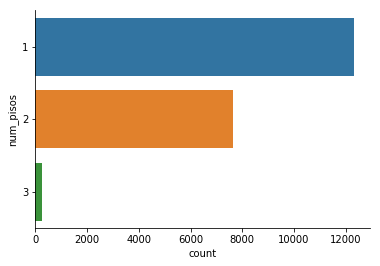

In [167]:
sns.countplot(y=casas.num_pisos)
sns.despine()

In [194]:
casas.describe()

,Año,cantidad_unidad,num_pisos,superficie
count,20242.000000,20242.000000,20242.000000,20242.000000
mean,2013.486019,5.462108,1.403221,525.118565
std,2.381779,31.051937,0.516078,2317.142198
min,2010.000000,1.000000,1.000000,8.000000
25%,2011.000000,1.000000,1.000000,58.000000
50%,2014.000000,1.000000,1.000000,119.000000
75%,2016.000000,1.000000,2.000000,244.000000
max,2017.000000,1278.000000,3.000000,83667.000000


Las casas són de 1 a 3 pisos (OK), construidas en su gran mayoria en Colinas y Milipilla, con una superficie de 8m2 a 84mil m2, lo que nos parece raro. hay que mirar lso altliers o reclasificar.

In [179]:
edificios = df[df.glosa_destino == 'edificio']

In [193]:
edificios.Comuna.value_counts()

nunoa                  231
las condes             190
santiago               182
providencia            164
san miguel             137
lo barnechea           113
estacion central       101
vitacura                91
la florida              78
quinta normal           49
independencia           48
macul                   35
la cisterna             34
quilicura               32
penalolen               25
la reina                24
renca                   23
pudahuel                22
huechuraba              18
maipu                   17
san joaquin             16
san bernardo            15
recoleta                13
el bosque               13
la granja                8
puente alto              8
cerrillos                7
melipilla                6
conchali                 6
colina                   5
talagante                4
la pintana               4
padre hurtado            4
cerro navia              4
lampa                    4
lo prado                 3
buin                     3
l

In [213]:
top_comunas_edif = edificios.Comuna.value_counts()[0:10]
top_comunas_edif

nunoa               231
las condes          190
santiago            182
providencia         164
san miguel          137
lo barnechea        113
estacion central    101
vitacura             91
la florida           78
quinta normal        49
Name: Comuna, dtype: int64

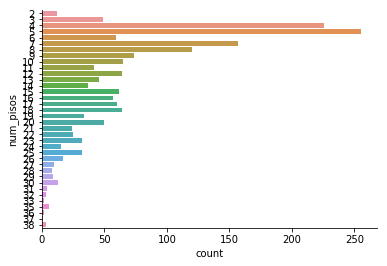

In [181]:
sns.countplot(y=edificios.num_pisos)
sns.despine()

In [215]:
edificios.describe()

,Año,cantidad_unidad,num_pisos,superficie
count,1739.000000,1739.000000,1739.000000,1739.000000
mean,2014.115009,161.678551,11.121909,14299.311098
std,2.098413,181.115765,7.231586,15480.339470
min,2010.000000,3.000000,2.000000,415.000000
25%,2012.000000,45.000000,5.000000,6333.000000
50%,2014.000000,105.000000,8.000000,10489.000000
75%,2016.000000,204.000000,16.000000,16989.500000
max,2017.000000,1401.000000,38.000000,218282.000000


Los edificios són de 2 (verificar) a 38 pisos (OK), construidas en su gran mayoria en Nunoa y Las Condes, con una superficie de 415m2 a 218mil m2, lo que nos parece OK a una primera vista.